# Feature Scaling Demo

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model, preprocessing

In [2]:
# Load the Boston Housing dataset
boston = datasets.load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
df.describe() # range of data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [12]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


In [37]:
df["stdtax"] = preprocessing.scale(df["TAX"])
df["stdcrm"] = preprocessing.scale(df["CRIM"])
#np.correlate(df["stdcrm"], df["CRIM"])
#df1 = pd.DataFrame(df["stdnox"])
#corr(df["stdnox"],df["stdcrm"])

In [38]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,stdnox,stdcrm,stdtax
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,-0.666608,-0.417713,-0.666608
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,-0.987329,-0.415269,-0.987329
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,-0.987329,-0.415272,-0.987329
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,-1.106115,-0.414680,-1.106115
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,-1.106115,-0.410409,-1.106115
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,-1.106115,-0.414974,-1.106115
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,-0.577519,-0.408169,-0.577519
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,-0.577519,-0.401618,-0.577519
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,-0.577519,-0.393853,-0.577519
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,-0.577519,-0.398650,-0.577519


In [33]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,stdnox,stdcrm,stdtax
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220,0.579564,1.000000,0.579564
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,-0.314563,-0.199458,-0.314563
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,0.720760,0.404471,0.720760
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,-0.035587,-0.055295,-0.035587
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,0.668023,0.417521,0.668023
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,-0.292048,-0.219940,-0.292048
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,0.506456,0.350784,0.506456
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,-0.534432,-0.377904,-0.534432
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,0.910228,0.622029,0.910228
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,1.000000,0.579564,1.000000


In [35]:
df.dtypes


CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
stdnox     float64
stdcrm     float64
stdtax     float64
dtype: object

## Scaling our data

Let's see what effect scaling our data has on some of the features by picking two features
that have a large difference in scale.

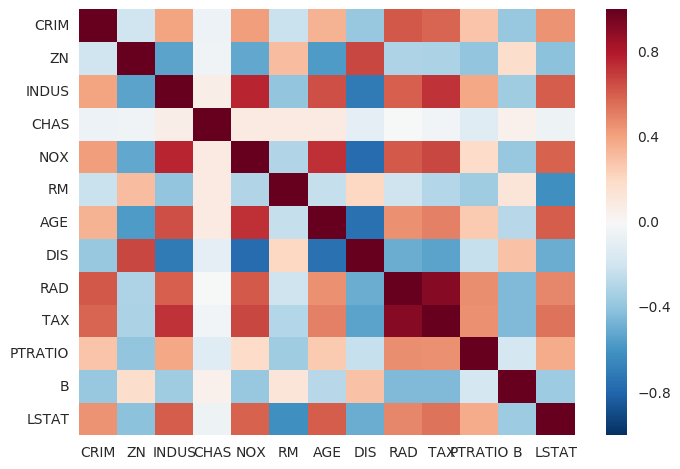

In [14]:
import seaborn as sns
sns.heatmap(df.corr())



In [15]:
boston.DESCR

"Boston House Prices dataset\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000\n        - PTRATIO  pupil-teac

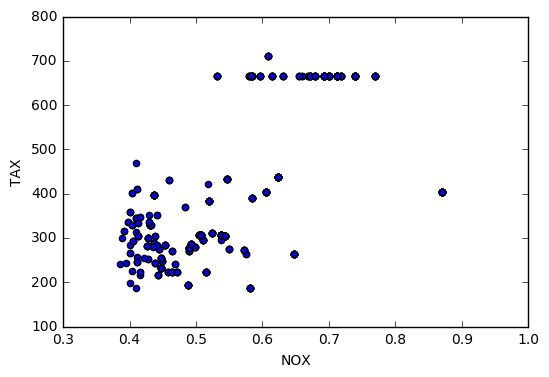

In [3]:
xs = df["NOX"]
ys = df["TAX"]

plt.scatter(xs, ys)
plt.xlabel("NOX")
plt.ylabel("TAX")
plt.show()

### Standardization

Let's apply standardization, transforming our data to have mean zero $(\mu = 0)$ and variance 1 $(\sigma^2 = 1)$ by the formula:

$$ x' = \frac{x - \mu}{\sigma}$$

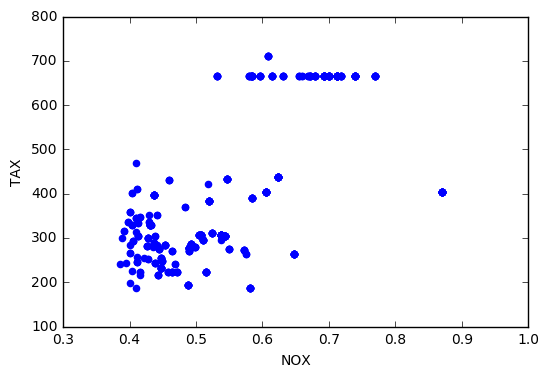

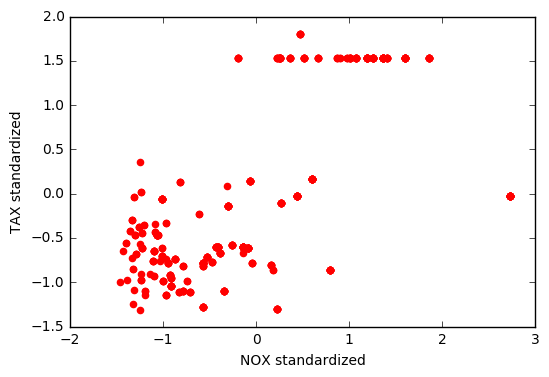

In [4]:
xs = df["NOX"]
ys = df["TAX"]
plt.scatter(xs, ys, color='b')
plt.xlabel("NOX")
plt.ylabel("TAX")
plt.show()

xs = df["NOX"]
mean = np.mean(xs)
std = np.std(xs)
xs = [(x - mean) / std for x in xs]

ys = df["TAX"]
mean = np.mean(ys)
std = np.std(ys)
ys = [(y - mean) / std for y in ys]

plt.scatter(xs, ys, color='r')
plt.xlabel("NOX standardized")
plt.ylabel("TAX standardized")
plt.show()

As you can see, we did not change the shape of the data, just its scale. You can also use scikit-learn to standardize your data.

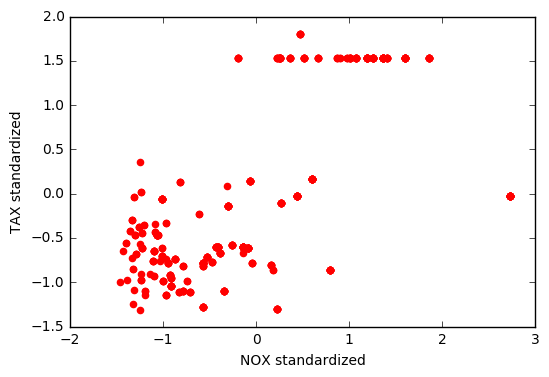

In [5]:
from sklearn import preprocessing

xs = preprocessing.scale(df["NOX"])
ys = preprocessing.scale(df["TAX"])

plt.scatter(xs, ys, color='r')
plt.xlabel("NOX standardized")
plt.ylabel("TAX standardized")
plt.show()


### Min-Max Scaling

To Min-Max scale our data, we use the formula:

$$x' = \frac{x - x_{min}}{x_{max} - x_{min}}$$

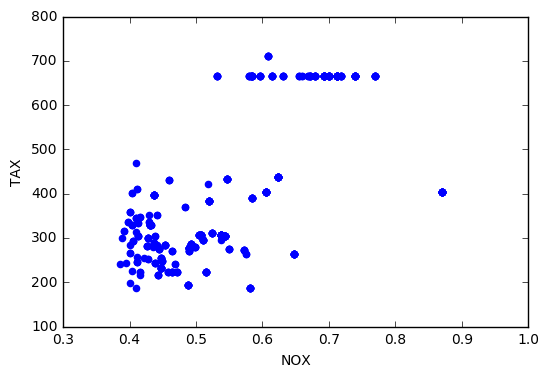

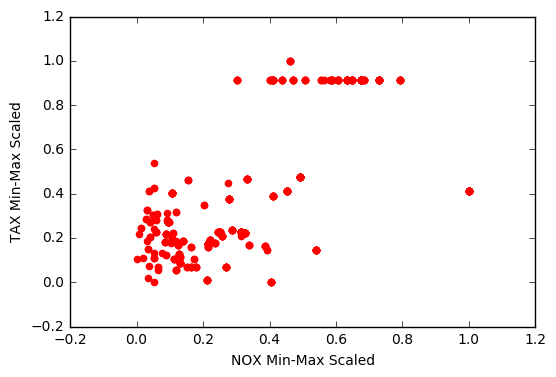

In [6]:
xs = df["NOX"]
ys = df["TAX"]
plt.scatter(xs, ys, color='b')
plt.xlabel("NOX")
plt.ylabel("TAX")
plt.show()

xs = df["NOX"]
xmin = np.min(xs)
xmax = np.max(xs)
xs = [(x - xmin) / (xmax - xmin) for x in xs]

ys = df["TAX"]
ymin = np.min(ys)
ymax = np.max(ys)
ys = [(y - ymin) / (ymax - ymin) for y in ys]

plt.scatter(xs, ys, color='r')
plt.xlabel("NOX Min-Max Scaled")
plt.ylabel("TAX Min-Max Scaled")
plt.show()

In [9]:
#We can use scikit-learn to Min-Max Scale.

SyntaxError: invalid syntax (<ipython-input-9-ac938856c8ff>, line 1)

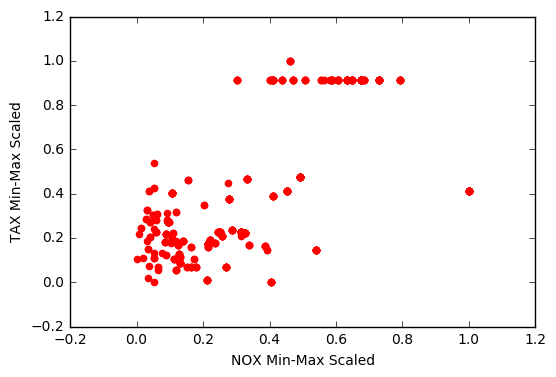

In [10]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()

xs = scaler.fit_transform(df[["NOX"]])
ys = scaler.fit_transform(df[["TAX"]])

plt.scatter(xs, ys, color='r')
plt.xlabel("NOX Min-Max Scaled")
plt.ylabel("TAX Min-Max Scaled")
plt.show()

### Normalization

We normalize the data by dividing through by some kind of sum or total. For example, it's common to normalize simply by the (*L1*) sum $|X| = \sum_{x \in X}{x}$ or by the (*L2*) euclidean sum of squares distance  $||X|| = \sqrt{\sum_{x \in X}{x^2}}$:

$$x' = \frac{x}{|X|}$$

## Guided Practice

Perform normalization by both the L1 and L2 sums and plot as we did for the other scaling methods.

If you finish early, repeat the exercise [using scikit-learn](http://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-normalization).

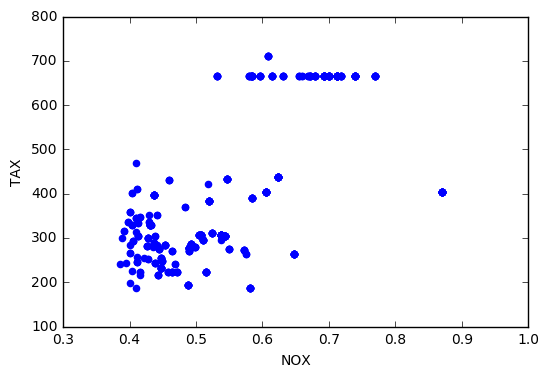

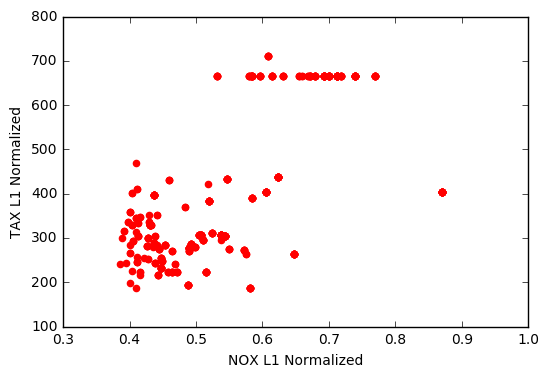

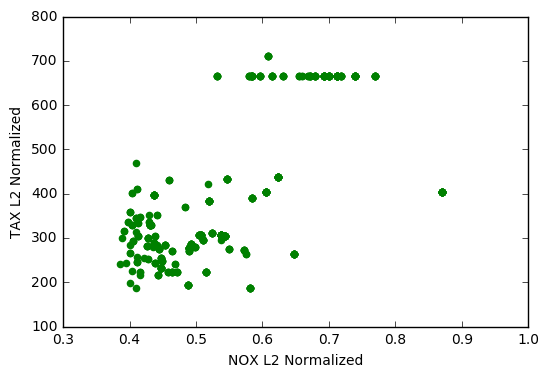

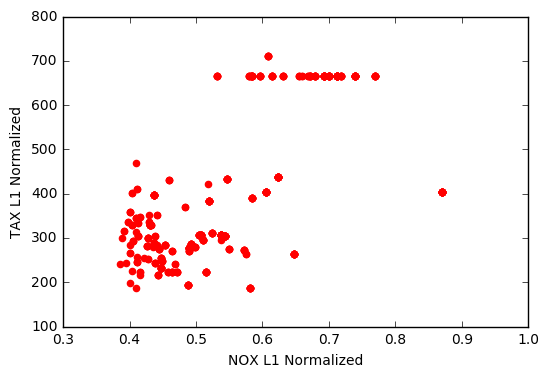

In [11]:
xs = df["NOX"]
ys = df["TAX"]
plt.scatter(xs, ys, color='b')
plt.xlabel("NOX")
plt.ylabel("TAX")
plt.show()

xs = df["NOX"]
ys = df["TAX"]
# Normalize xs and ys with L1 sum

plt.scatter(xs, ys, color='r')
plt.xlabel("NOX L1 Normalized")
plt.ylabel("TAX L1 Normalized")
plt.show()

xs = df["NOX"]
ys = df["TAX"]
# Normalize xs and ys with L2 sum

plt.scatter(xs, ys, color='g')
plt.xlabel("NOX L2 Normalized")
plt.ylabel("TAX L2 Normalized")
plt.show()

# Sklearn
# Use preprocessing.normalize on xs and ys
xs = df["NOX"]
ys = df["TAX"]

plt.scatter(xs, ys, color='r')
plt.xlabel("NOX L1 Normalized")
plt.ylabel("TAX L1 Normalized")
plt.show()

### Independent Practice

Let's practice linear fits using feature scaling. For each of the three scaling methods we've discussed:
* Practice scaling and linear fits on the boston housing data using all the data (scaled) versus the target data `boston.target`. Does scaling or normalization affect any of your models? Determine if the model fit score changed. Explain why or why not. (10-20 mins).

Next:
* Try some regularized models. Does scaling have a significant effect on the fit? (10 mins)
* Try some other models from scikit-learn, such as a [SGDRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html).
It's ok if you are unfamiliar with the model, just follow the example code
and explore the fit and the effect of scaling. (10 mins)
* Bonus: try a few extra models like a [support vector machine](http://scikit-learn.org/stable/auto_examples/svm/plot_svm_regression.html). What do you think
about the goodness of fit? Scaling is _required_ for this model.

### Bonus Exercises

Using Scikit-learn, fit some other model to the data, for example a regularization model like a Ridge or Lasso, a [SGDRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html), or a [support vector machine](http://scikit-learn.org/stable/auto_examples/svm/plot_svm_regression.html). Do any of the scaling methods affect the goodness of fit?

In [41]:
# These are all basically the same, here's one example.
# The linear regression fit score is not affected by scaling since the coefficients adapt.

df = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

X = boston.feature_names


In [44]:
y

array([ 24. ,  21.6,  34.7,  33.4,  36.2,  28.7,  22.9,  27.1,  16.5,
        18.9,  15. ,  18.9,  21.7,  20.4,  18.2,  19.9,  23.1,  17.5,
        20.2,  18.2,  13.6,  19.6,  15.2,  14.5,  15.6,  13.9,  16.6,
        14.8,  18.4,  21. ,  12.7,  14.5,  13.2,  13.1,  13.5,  18.9,
        20. ,  21. ,  24.7,  30.8,  34.9,  26.6,  25.3,  24.7,  21.2,
        19.3,  20. ,  16.6,  14.4,  19.4,  19.7,  20.5,  25. ,  23.4,
        18.9,  35.4,  24.7,  31.6,  23.3,  19.6,  18.7,  16. ,  22.2,
        25. ,  33. ,  23.5,  19.4,  22. ,  17.4,  20.9,  24.2,  21.7,
        22.8,  23.4,  24.1,  21.4,  20. ,  20.8,  21.2,  20.3,  28. ,
        23.9,  24.8,  22.9,  23.9,  26.6,  22.5,  22.2,  23.6,  28.7,
        22.6,  22. ,  22.9,  25. ,  20.6,  28.4,  21.4,  38.7,  43.8,
        33.2,  27.5,  26.5,  18.6,  19.3,  20.1,  19.5,  19.5,  20.4,
        19.8,  19.4,  21.7,  22.8,  18.8,  18.7,  18.5,  18.3,  21.2,
        19.2,  20.4,  19.3,  22. ,  20.3,  20.5,  17.3,  18.8,  21.4,
        15.7,  16.2,

In [45]:
X

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], 
      dtype='|S7')

In [ ]:
# Stochastic Regressor -- scaling makes a huge difference
# linear_model.SGDRegressor()

# Unscaled



# Scaled

